Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step: 100, Loss: 2369.398926, Accuracy: 0.930500
Step: 200, Loss: 2481.897217, Accuracy: 0.926100
Step: 300, Loss: 1786.661499, Accuracy: 0.947000
Step: 400, Loss: 1504.581543, Accuracy: 0.956200
Step: 500, Loss: 1651.885742, Accuracy: 0.950800
Step: 600, Loss: 1169.511108, Accuracy: 0.962400
Step: 700, Loss: 1234.159180, Accuracy: 0.961400
Step: 800, Loss: 1100.060059, Accuracy: 0.968300
Step: 900, Loss: 1219.877197, Accuracy: 0.964100
Step: 1000, Loss: 1372.588257, Accuracy: 0.963100


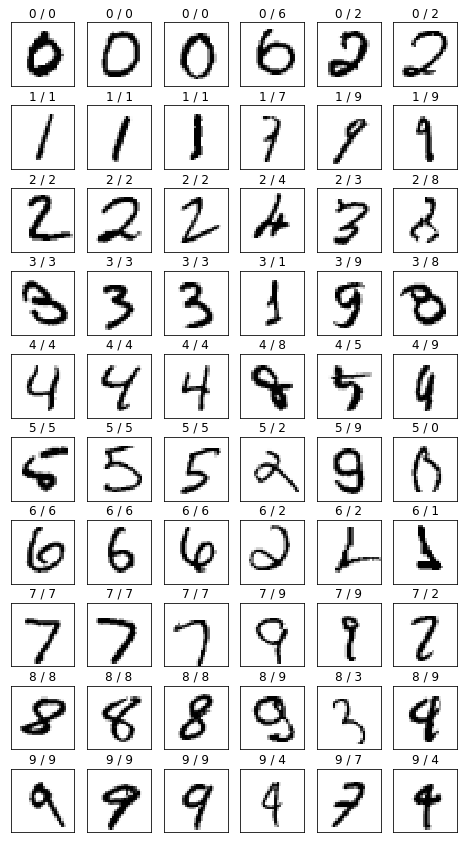

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

#　tensorflow による 3層（中間層1層）ニューラルネットワークによるmnistの学習とテスト

# 乱数設定
np.random.seed(20181116)
tf.set_random_seed(20181116)

# mnist のデータ読み込み
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)


# 中間層ニューロン数の設定
#num_units = 1024
num_units = 2048

# 入力層（28×28=784 ニューロン）
x = tf.placeholder(tf.float32, [None, 784])

# 入力層と中間層の結合
w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
# 活性化関数
#hidden1 = tf.nn.tanh(tf.matmul(x,w1) + b1)# 中間層出力
hidden1 = tf.nn.relu(tf.matmul(x,w1) + b1)

# 中間層と出力層の結合
w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)# 出力層出力


t = tf.placeholder(tf.float32, [None, 10]) #教師信号

# x (入力 [None, 784] ）と t (教師[None, 10]) ) には，まだ，具体的な値は与えていない．

loss = -tf.reduce_sum(t*tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# session の考え方は TensorBoard のデータグラフによるプログラミングと関係
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

#最急降下法の繰り返し
i = 0
#for _ in range(2000):
for _ in range(1000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100) # データを取り出し，どこまで取り出したか記憶している
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts}) #feed_dict オプションで入力データと学習データを与える
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], #feed_dict オプションでテストデータ全部を与える
            feed_dict={x:mnist.test.images, t: mnist.test.labels}) 
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))
        

# ここから下は結果の グラフィック表示      
        
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8,15))

for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape(28,28), vmin=0, vmax=1,
                          cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break
                
                

                




## 重み（変数）の表示

In [7]:
w0_val = sess.run(w0)
print(w0_val)

[[ 0.0186804  -0.05085298 -0.01379882 ... -0.01482952 -0.03700328
   0.04963158]
 [ 0.01272014  0.00753721 -0.00568418 ... -0.01591372  0.01815383
   0.00811309]
 [ 0.00382221 -0.00656543  0.00112633 ... -0.00577464  0.00075841
   0.00060808]
 ...
 [-0.01809215 -0.00665306 -0.01103797 ... -0.02535352  0.00614343
   0.0136677 ]
 [ 0.00445942  0.00672188 -0.00488001 ...  0.00114195 -0.00160927
  -0.00309529]
 [ 0.00975436 -0.02862244 -0.00625725 ... -0.00883831  0.00195669
  -0.0177239 ]]


## 重みw（変数）の print には，毎回，sess.rum が必用

In [12]:
i=0
w0_val = sess.run(w0)
w0_val = w0_val[i][0]
print(w0_val)
i=100
w0_val = sess.run(w0) 
#毎回，sess.runが必用
w0_val = w0_val[i][0]
print(w0_val)

0.018680403
-0.013599958


In [9]:
i=0 #これやらないと，このセルをRunするごとに，毎回，iの値が更新される
w0_val = sess.run(w0)
#for _ in range(num_units):
#for i in range(num_units):
for j in range(10):
    w0_val = sess.run(w0) #毎回，sess.runが必用
#    print(num_units)
#    print(j)
    w0_val = w0_val[j][0]
    print(w0_val)

0.018680403
0.0127201425
0.0038222093
0.009984681
-0.036791366
-0.0102617685
-0.0031190738
-0.028079024
-0.017319301
0.0062120548


In [10]:
w0

<tf.Variable 'Variable_6:0' shape=(2048, 10) dtype=float32_ref>